# Housing Prices Modeling Notebook
 First importing all the needed modules


In [4597]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 
from scipy.stats import pearsonr

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor


# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

#Add Extra Modules
from math import sin, cos, sqrt, atan2
from datetime import datetime, timedelta
import cpi
import re



# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.display.max_columns = None
pd.options.display.width = None

# Load Data

In [4598]:
data = pd.read_csv("data/kc_house_data.csv")
df_school = pd.read_csv('data/AIM-EOC-MSP-SBA_Assessments_School__with_suppression_-_new_format__2017.csv')
crime = pd.read_csv('data/KCSO_Offense_Reports__2020_to_Present.csv')


# Now lets look at the data for each source
* House Data
* School Grade Data
* Crime Data

In [4599]:
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,"675,000.00",4,1.00,1180,7140,1.00,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19
1,8910500230,12/13/2021,"920,000.00",5,2.50,2770,6703,1.00,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36


In [4600]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4601]:
df_school.head(2)

,ESD,County,District,DistrictCode,School,SchoolCode,schoolYear,testAdministration,Subject,GradeLevel,StudentGroup,suppressed,suppressReason,countTotalTested_and_NotTested,countMetStandardIncludingPP,PercentMetStandardIncludingPP,countMetStandardWithoutPP,PercentMetStandardWithoutPP,percentMeetingStandardExcludingNoScore,countLevel4,PercentLevel4,countLevel3,PercentLevel3,countLevelBasic,PercentLevelBasic,countLevel2,PercentLevel2,countLevel1,PercentLevel1,countNoScore,percentNoScore,countNotMet,PercentNotMet,countExcusedAbsence,countExempted
0,Northwest Educational Service District 189,Snohomish County,Marysville School District,"31,025.00",10th Street School,1656,2016-2017,SBA,ELA,6th,All,True,Cross Organization: School Home Partnership Pr...,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Northwest Educational Service District 189,Snohomish County,Marysville School District,"31,025.00",10th Street School,1656,2016-2017,SBA,ELA,6th,Male,True,Cross Organization: School Home Partnership Pr...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4602]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250540 entries, 0 to 250539
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ESD                                     241913 non-null  object 
 1   County                                  242208 non-null  object 
 2   District                                242208 non-null  object 
 3   DistrictCode                            242208 non-null  float64
 4   School                                  250540 non-null  object 
 5   SchoolCode                              250540 non-null  int64  
 6   schoolYear                              250540 non-null  object 
 7   testAdministration                      250540 non-null  object 
 8   Subject                                 250540 non-null  object 
 9   GradeLevel                              250540 non-null  object 
 10  StudentGroup                            2505

In [4603]:
crime.head(2)

,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C21034525,10/29/2021 11:21:00 AM,120,Robbery,14900 Block 4TH AVE SW,BURIEN,WA,98166,Reporting Area N05051,District N5,4.00,10/29/2021 03:04:35 PM,10/29/2021 03:39:50 PM,11,6,29495462116
1,C21034462,10/28/2021 08:10:00 PM,290,Destruction/Damage/Vandalism of Property,17600 Block 152ND PL SE,RENTON,WA,98058,Reporting Area F05007,District F5,3.00,10/29/2021 02:49:33 PM,10/29/2021 02:50:04 PM,20,5,29495152983


In [4604]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63618 entries, 0 to 63617
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_number        63618 non-null  object 
 1   incident_datetime  63618 non-null  object 
 2   nibrs_code         63618 non-null  object 
 3   nibrs_code_name    63618 non-null  object 
 4   block_address      60744 non-null  object 
 5   city               63578 non-null  object 
 6   state              63618 non-null  object 
 7   zip                62297 non-null  object 
 8   reporting_area     63266 non-null  object 
 9   district           63282 non-null  object 
 10  precinct           58782 non-null  float64
 11  created_at         63618 non-null  object 
 12  updated_at         63618 non-null  object 
 13  hour_of_day        63618 non-null  int64  
 14  day_of_week        63618 non-null  int64  
 15  ID                 63618 non-null  int64  
dtypes: float64(1), int64(3

# Distance Calculation

* We look at the following to see if there are locations that have higher price then others
* Create a list of the areas we found are high priced
* Created a now column that finds the shortest distance between the house and the areas we determined

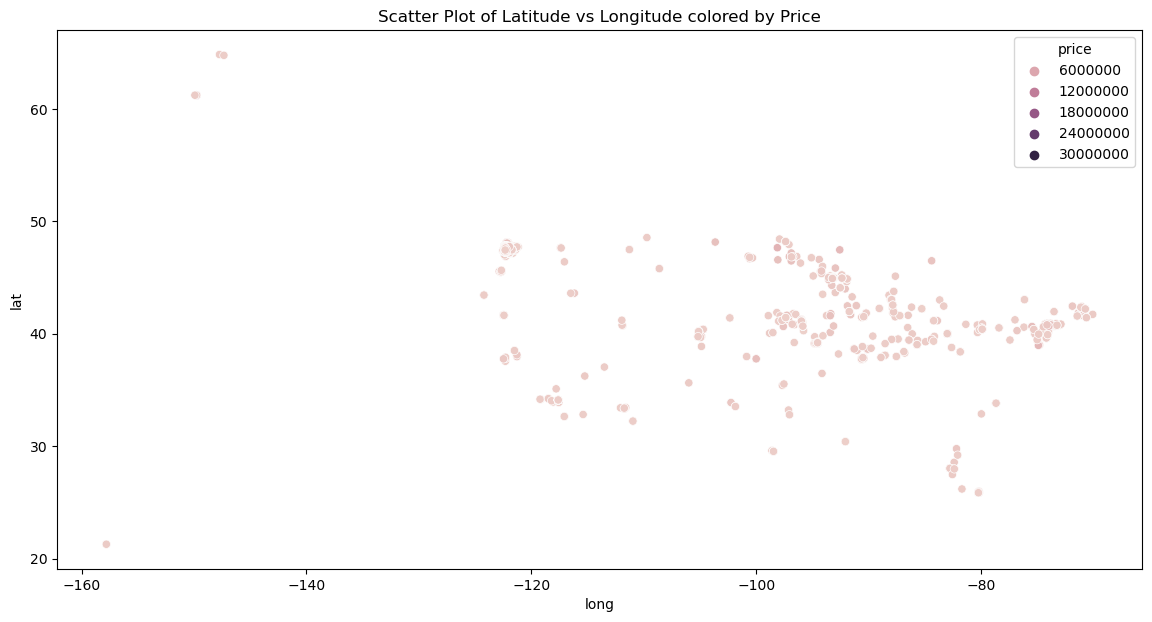

In [4605]:
plt.figure(figsize=(14, 14))
ax = sns.scatterplot(x='long', y='lat', hue='price', data=data)
ax.set_aspect('equal')
plt.title("Scatter Plot of Latitude vs Longitude colored by Price")
plt.show()

Realize that we have bad data in the lat long ield so we will have to remove the outliers outside Kings County

In [4606]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine distance between two points on the Earth's surface.
    """
    R = 6371  # radius of Earth in km

    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

urban_centers_dict = {
    "Mercer Island": (47.559367, -122.219335),
    "Magnolia": (47.651347, -122.404011),
    "Kirkland": (47.682111, -122.205549),
    "Somerset": (47.557850, -122.147104),
    "Beaver Lake": (47.590782, -121.998691),
    "Union Bay": (47.647763, -122.282622),
    "Medina": (47.625635, -122.232134)
}

def closest_urban_center(row):
    lat1, lon1 = row['lat'], row['long']
    distances = [haversine(lat1, lon1, lat2, lon2) for lat2, lon2 in urban_centers_dict.values()]
    return min(distances)

data['distance'] = data.apply(closest_urban_center, axis=1)

# Create a dataframe of school districts.

I went to google maps to look up each distict in Kings County and found the GPS location of the center of each

In [4607]:
# Define a dictionary with school district information
district_dict = {
    17001: ['Seattle', 47.604224, -122.310822],
    17210: ['Federal Way', 47.306740, -122.334571],
    17216: ['Enumclaw', 47.202359, -121.989672],
    17400: ['Mercer Island', 47.563806, -122.221739],
    17401: ['Highline', 47.503040, -122.333787],
    17402: ['Vashon Island', 47.415653, -122.465464],
    17403: ['Renton', 47.480680, -122.194300],
    17404: ['Skykomish', 47.709979, -121.358584],
    17405: ['Bellevue', 47.601939, -122.153399],
    17406: ['Tukwila', 47.465515, -122.264383],
    17408: ['Auburn', 47.298994, -122.209005],
    17409: ['Tahoma', 47.408238, -121.978171],
    17410: ['Snoqualmie Valley', 47.467175, -121.721867],
    17411: ['Issaquah', 47.541392, -122.042553],
    17412: ['Shoreline', 47.758887, -122.340132],
    17414: ['Lake Washington', 47.682244, -122.116046],
    17415: ['Kent', 47.370687, -122.179470],
    17417: ['Northshore', 47.768389, -122.152624],
    27417: ['Fife', 47.246443, -122.331492],
    17407: ['Riverview', 47.706997, -121.847689]
}

# Create a dataframe from the dictionary
df_school_district = pd.DataFrame.from_dict(district_dict, orient='index', columns=['district', 'lat', 'long'])
df_school_district.reset_index(inplace=True)
df_school_district.rename(columns={'index': 'DistrictCode'}, inplace=True)

# Add School Scores to data

* Create a dataframe of School Districts with the average grade of the students

In [4608]:
df_school.dropna(subset=['countLevel4'], inplace=True)
grouped = df_school.groupby("DistrictCode")["PercentMetStandardIncludingPP"].mean()
grouped = grouped.reset_index()
df_school_district = df_school_district.merge(grouped, on="DistrictCode")
df_school_district = df_school_district.rename(columns={"PercentMetStandardIncludingPP": "average_grade"})

Added the average grade to the data by finding the closest district to the house

* we know this isn't perfect but for the timeframe this is the easiest way to do it.

In [4609]:
# Calculate haversine distances between all the points in the data DataFrame and the df_school_district DataFrame
distances = df_school_district.apply(lambda x: np.sqrt((data['lat'] - x['lat'])**2 + (data['long'] - x['long'])**2), axis=1)

# Find the index of the minimum value in each row
min_idx = distances.idxmin(axis=0)

# Look up the corresponding average_grade value in the df_school_district DataFrame
data = data.assign(school_grade=df_school_district.loc[min_idx, 'average_grade'].values)


# Look at the distrobution of price

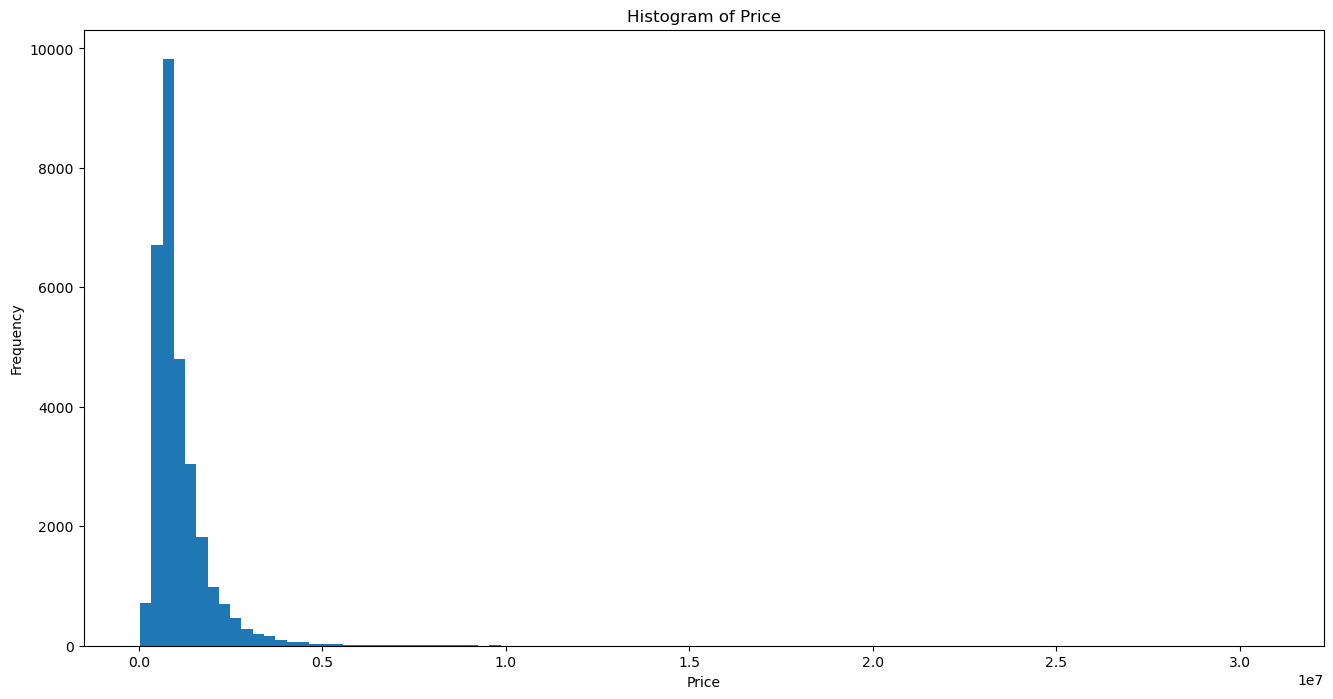

In [4610]:
plt.figure(figsize=(16,8))
plt.hist(data['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

# Looking at how some of the columns relate to price

Text(0.5, 1.0, "'Boxplot 'Waterfront' vs 'Price'")

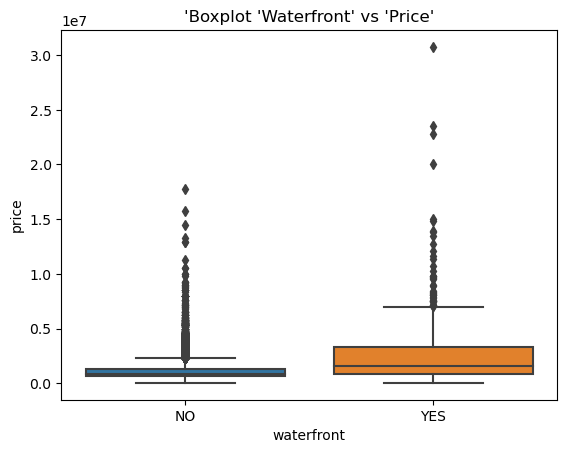

In [4611]:
data['waterfront'] = data['waterfront'].astype('category')
sns.boxplot(x='waterfront', y='price', data=data)
plt.title("'Boxplot 'Waterfront' vs 'Price'")

Text(0.5, 1.0, "'Regplot 'sqft_living' vs 'Price'")

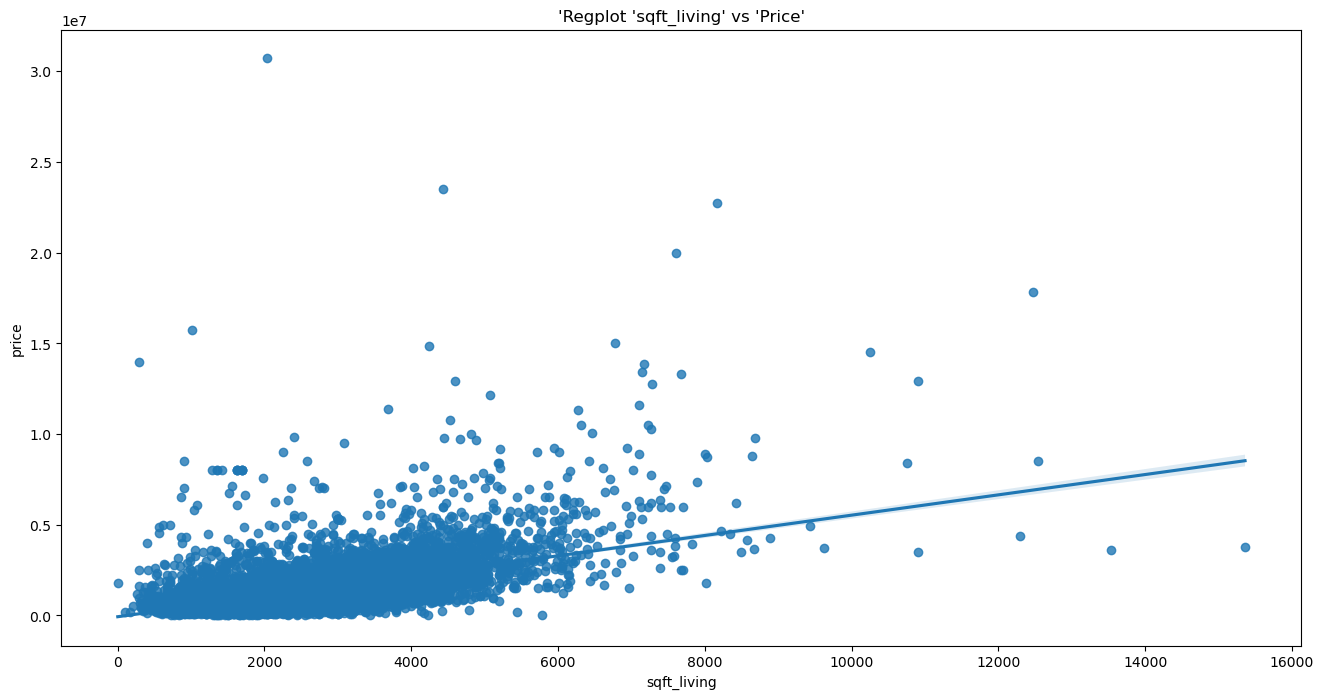

In [4612]:
plt.figure(figsize=(16,8))
sns.regplot(x='sqft_living', y='price', data=data)
plt.title("'Regplot 'sqft_living' vs 'Price'")

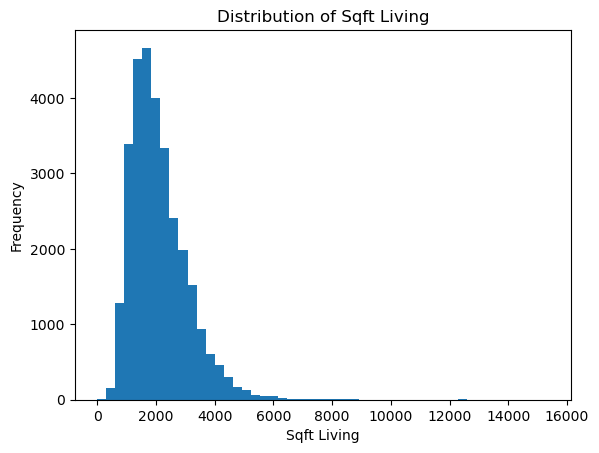

In [4613]:
plt.hist(data['sqft_living'], bins=50)
plt.title("Distribution of Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.show()

In [4614]:
data = data[data['sqft_living'] <= 5000]
data = data[data['sqft_living'] >= 100]

In [4615]:
data = data[data['distance'] <= 25]

In [4616]:
data = data[data['price'] <= 2500000]

# Check map again

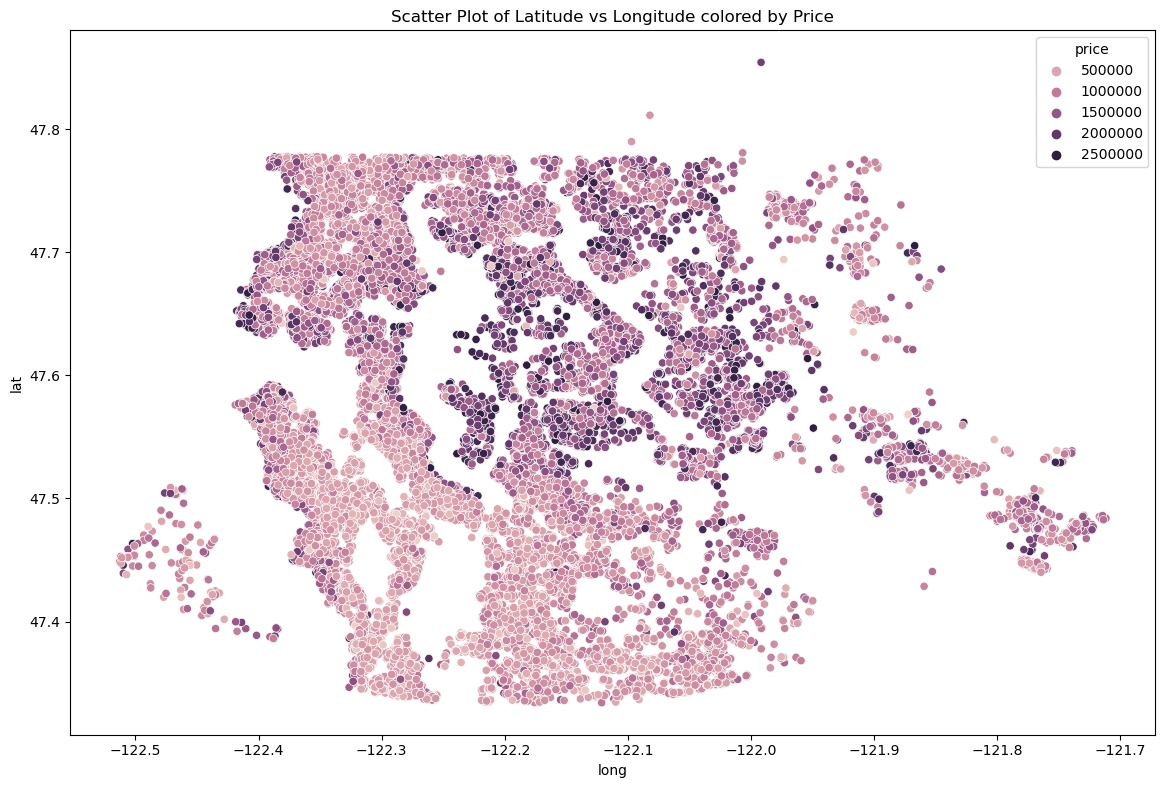

In [4617]:
plt.figure(figsize=(14, 14))
ax = sns.scatterplot(x='long', y='lat', hue='price', data=data)
ax.set_aspect('equal')
plt.title("Scatter Plot of Latitude vs Longitude colored by Price")
plt.show()

Charts after removal of over 2.5mill houses and getting rid of sqft_living outliers and houses outside of Kings County

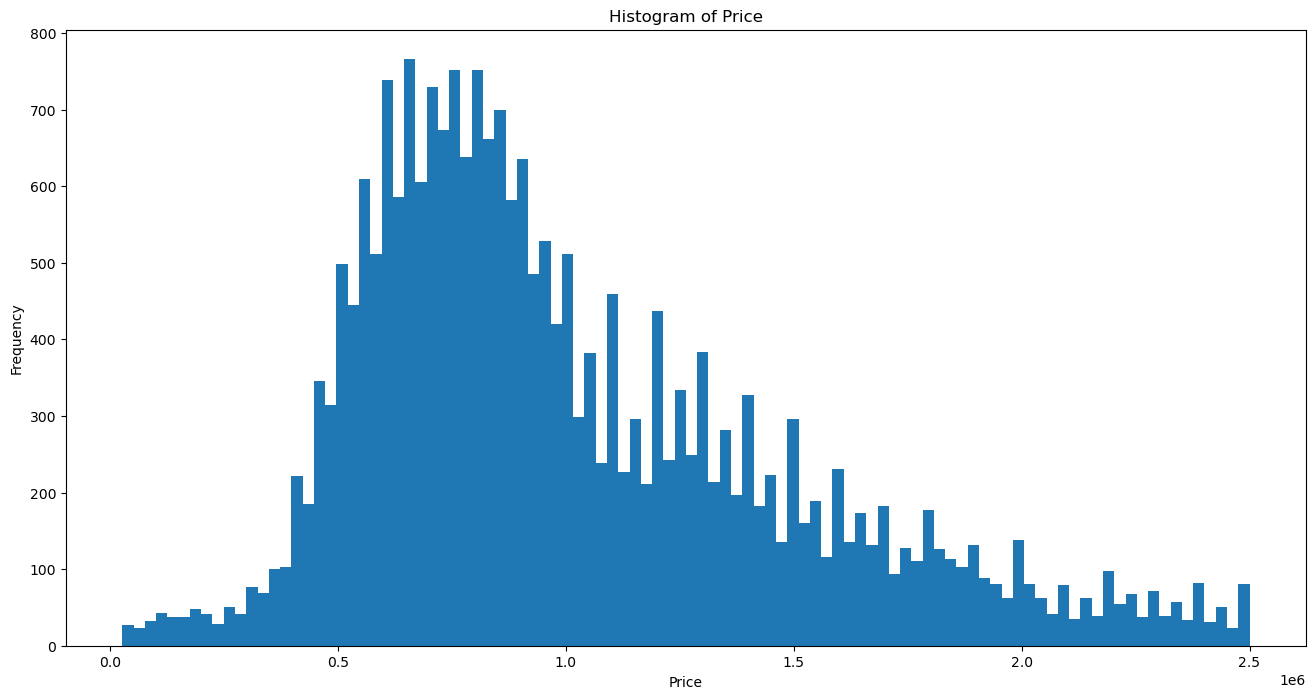

In [4618]:
plt.figure(figsize=(16,8))
plt.hist(data['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

Text(0.5, 1.0, "'Regplot 'sqft_living' vs 'Price'")

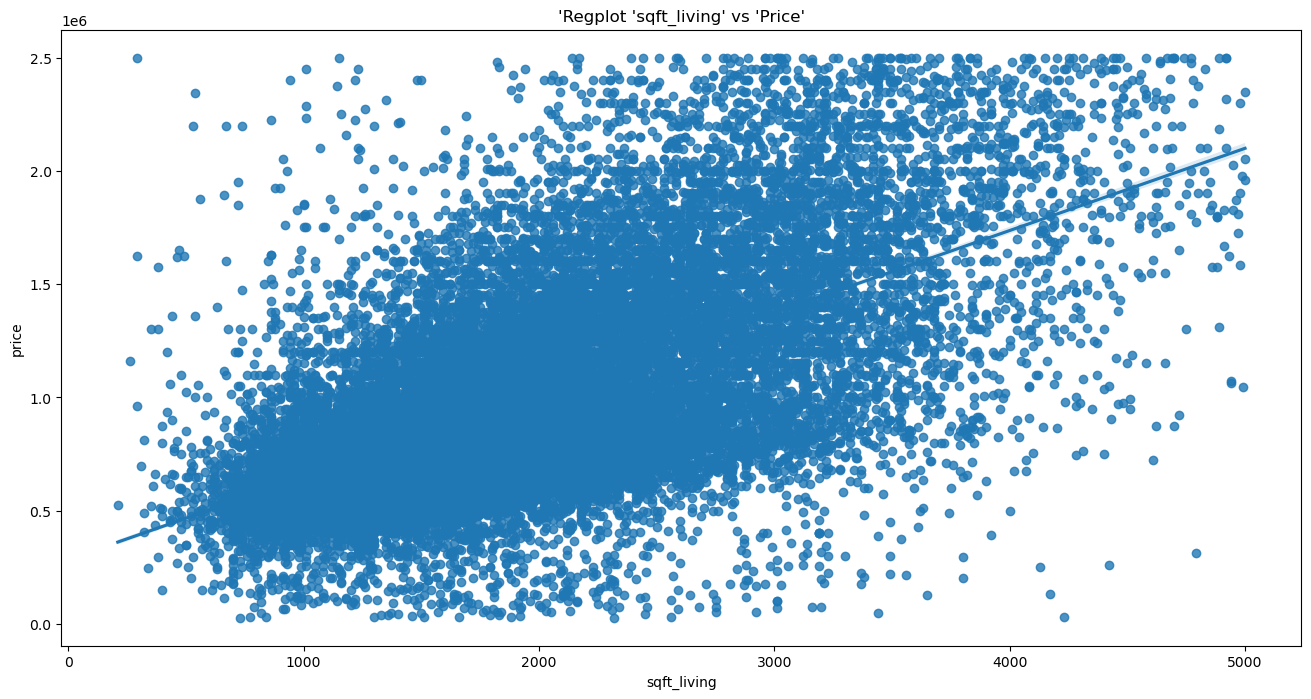

In [4619]:
plt.figure(figsize=(16,8))
sns.regplot(x='sqft_living', y='price', data=data)
plt.title("'Regplot 'sqft_living' vs 'Price'")

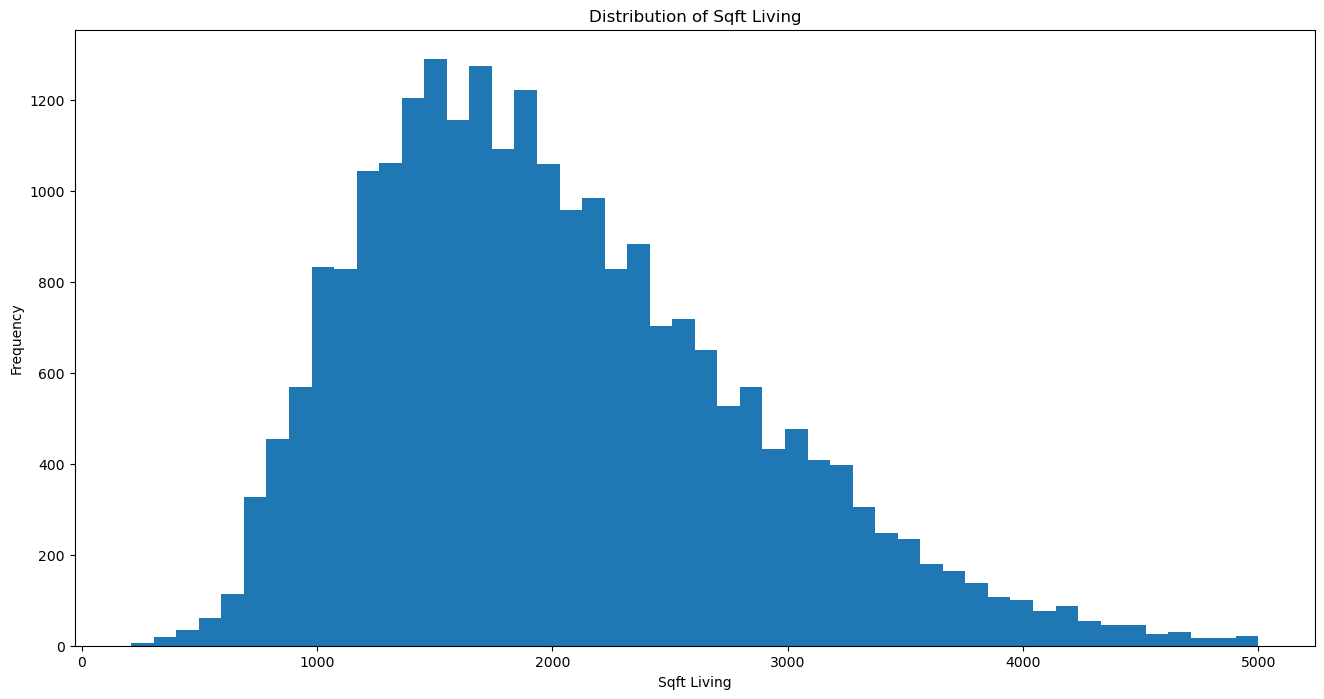

In [4620]:
plt.figure(figsize=(16,8))
plt.hist(data['sqft_living'], bins=50)
plt.title("Distribution of Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, "'Boxplot 'Greenbelt' vs 'Price'")

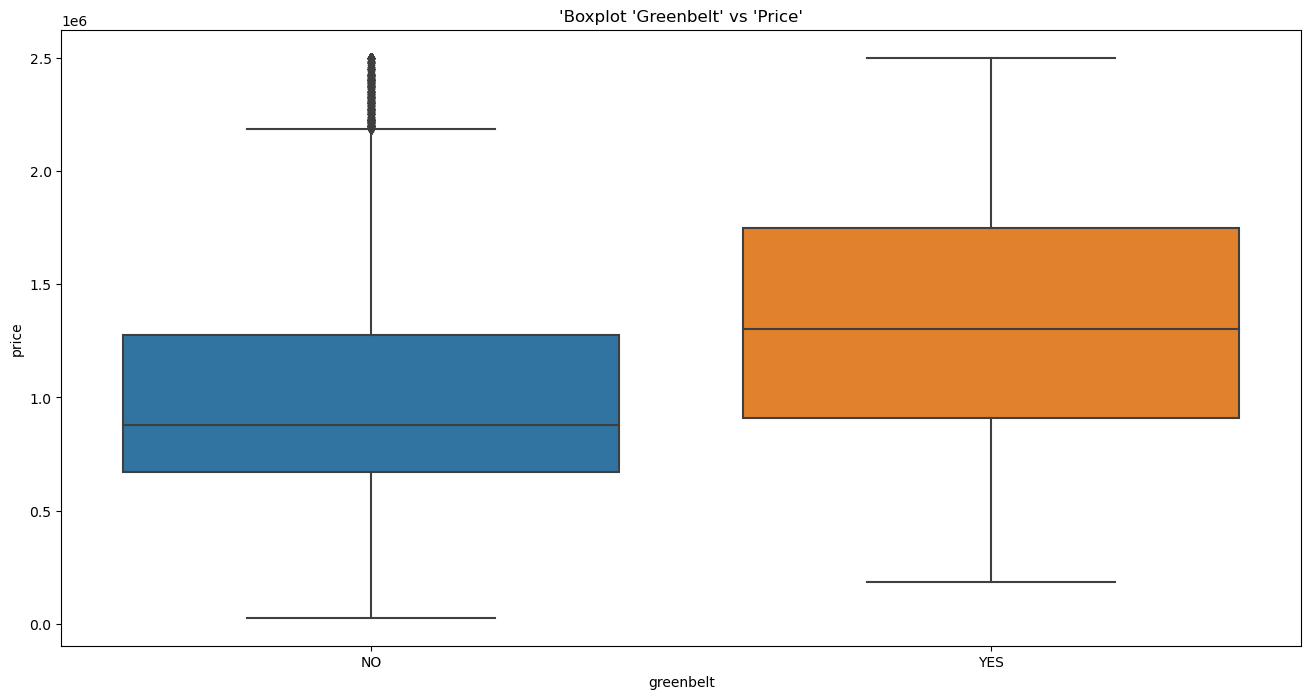

In [4621]:
plt.figure(figsize=(16,8))
data['greenbelt'] = data['greenbelt'].astype('category')
sns.boxplot(x='greenbelt', y='price', data=data)
plt.title("'Boxplot 'Greenbelt' vs 'Price'")

Text(0.5, 1.0, "'Boxplot 'Nuisance' vs 'Price'")

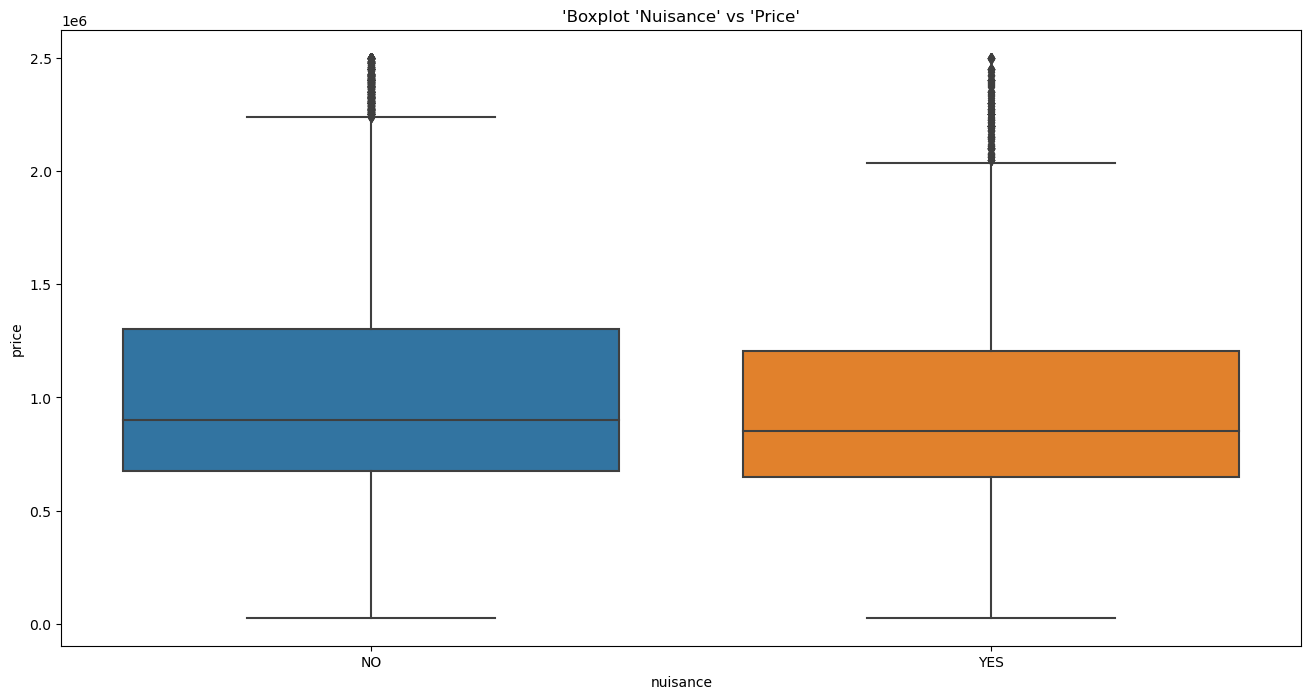

In [4622]:
plt.figure(figsize=(16,8))
data['nuisance'] = data['nuisance'].astype('category')
sns.boxplot(x='nuisance', y='price', data=data)
plt.title("'Boxplot 'Nuisance' vs 'Price'")

Text(0.5, 1.0, "'Boxplot 'Heat Source' vs 'Price'")

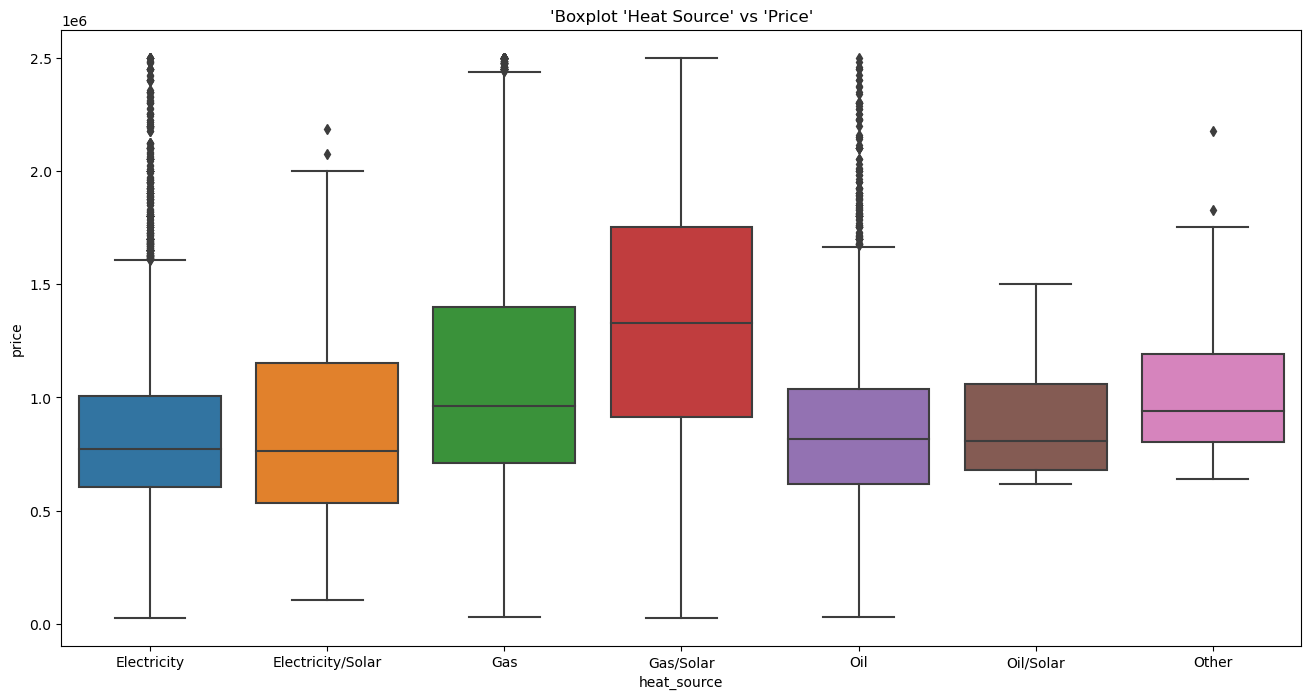

In [4623]:
plt.figure(figsize=(16,8))
data['heat_source'] = data['heat_source'].astype('category')
sns.boxplot(x='heat_source', y='price', data=data)
plt.title("'Boxplot 'Heat Source' vs 'Price'")

In [4624]:
data = data.dropna()
data['waterfront'] = data['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
data['greenbelt'] = data['greenbelt'].apply(lambda x: 1 if x == 'YES' else 0)
data['nuisance'] = data['nuisance'].apply(lambda x: 1 if x == 'YES' else 0)

Waterfront and Greenbelt seem to have some effect on price but nuisance effect seems minimal

# Change the Ordinal catagories into intigers so they can be used for modeling

In [4625]:
data['grade'] = data['grade'].str.extract(r'(\d+)').astype(int)
data['grade'].unique()

array([ 7,  9,  8,  6, 10,  5,  4, 11,  3, 12])

In [4626]:
condition_mapping = {'Very Good': 5, 'Good': 4, 'Average': 3, 'Fair': 2, 'Poor': 1}
data['condition'] = data['condition'].map(condition_mapping)
data['condition'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [4627]:
view_mapping = {'NONE': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}
data['view'] = data['view'].map(view_mapping)
data['view'].unique()

array([1, 3, 5, 2, 4], dtype=int64)

In [4628]:
data = data.drop(['heat_source'], axis=1)

Decided to adjust for inflation based on year sold for any price prior to 2022 so the $ of one record is equal to 

In [4629]:
data['date'] = pd.to_datetime(data['date'])
data['price'] = data.apply(lambda row: cpi.inflate(row['price'],row['date'].year) if row['date'].year < 2022 else row['price'], axis=1)

In [4630]:
data['has_been_renovated'] = np.where(data['yr_renovated'] != 0, 1, 0)

In [4631]:
data['zip_code'] = data['address'].str[-20:-15]

In [4632]:
# First, calculate the mean sqft_living for each zip code
zip_code_sqft_lot = data.groupby('zip_code')['sqft_lot'].mean()

# Next, divide the zip codes into sq_ft categories based on their mean sqft_living
zip_code_categories = pd.cut(zip_code_sqft_lot, bins=80, labels=False, retbins=False)

# Count the number of rows in the crime dataset grouped by zip code
zip_code_crime = crime.groupby('zip')['case_number'].count()
zip_code_count = data.groupby('zip_code')['zip_code'].count()

# Finally, add the price category as a new column to the train_data dataframe
data['zip_code_category'] = data['zip_code'].map(zip_code_categories)

# Map the bin to the corresponding zip code in data
data['zip_code_category_crime'] = data['zip_code'].map(zip_code_crime) / data['zip_code'].map(zip_code_count)
data['zip_code_category_crime'].fillna(0, inplace=True)


data['has_basement'] = (data['sqft_basement'] > 0).astype(int)
data['has_patio'] = (data['sqft_patio'] > 0).astype(int)
data['sqft_garage'] = (data['sqft_garage'] > 0).astype(int)


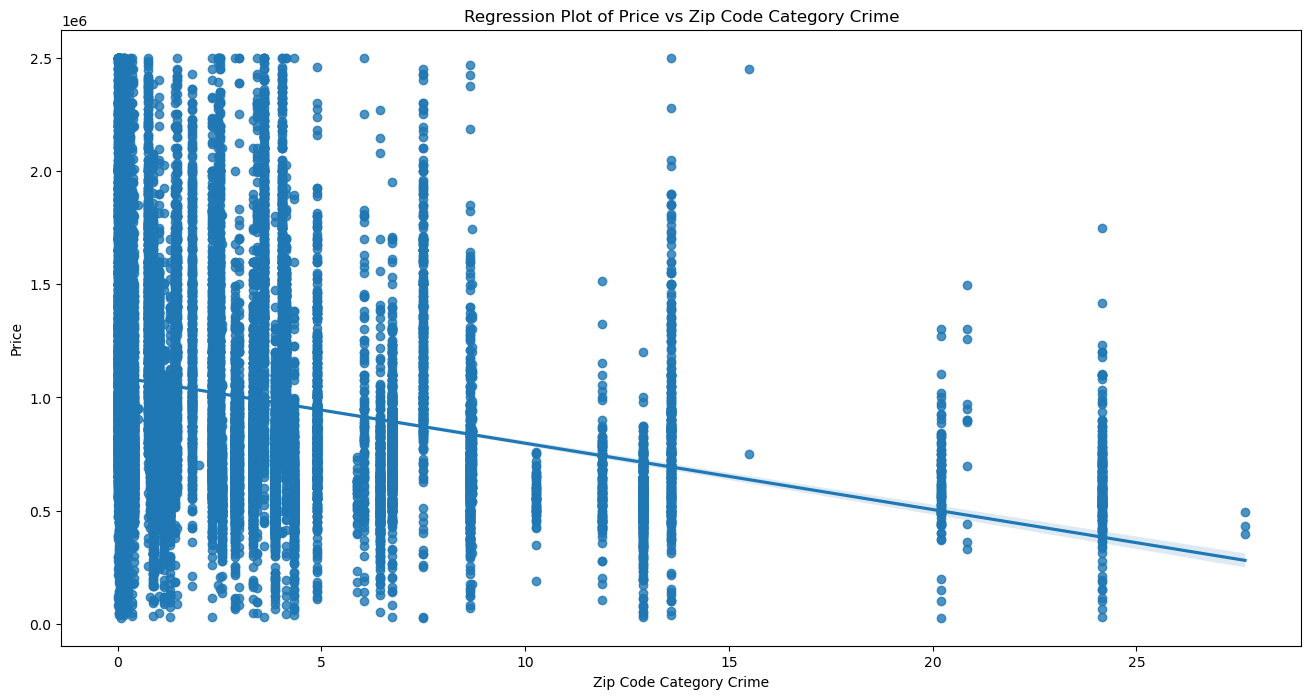

In [4633]:
plt.figure(figsize=(16,8))
sns.regplot(x='zip_code_category_crime', y='price', data=data)
plt.xlabel('Zip Code Category Crime')
plt.ylabel('Price')
plt.title('Regression Plot of Price vs Zip Code Category Crime')
plt.show()

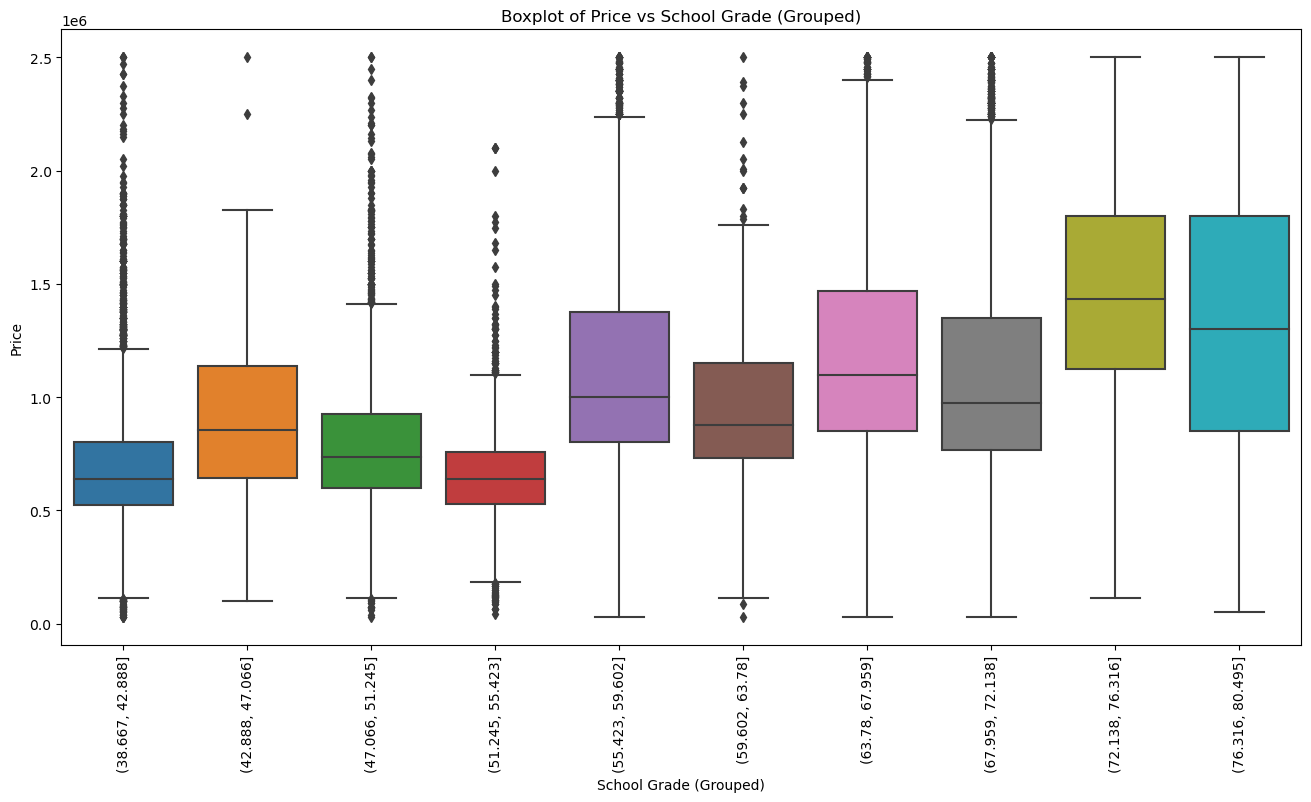

In [4640]:
data['school_grade_grouped'] = pd.cut(data['school_grade'], bins=10)

plt.figure(figsize=(16,8))
sns.boxplot(x='school_grade_grouped', y='price', data=data)

plt.xlabel('School Grade (Grouped)')
plt.ylabel('Price')
plt.title('Boxplot of Price vs School Grade (Grouped)')
plt.xticks(rotation=90)
plt.show()

In [4635]:
data['distance'] = np.log(data['distance']+1)

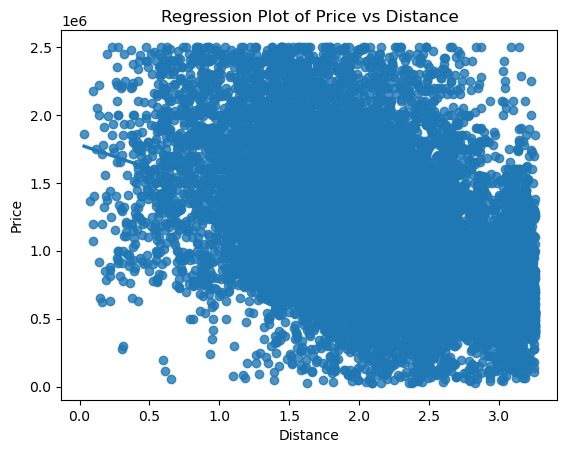

In [4636]:
sns.regplot(x='distance', y='price', data=data)
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Regression Plot of Price vs Distance')
plt.show()

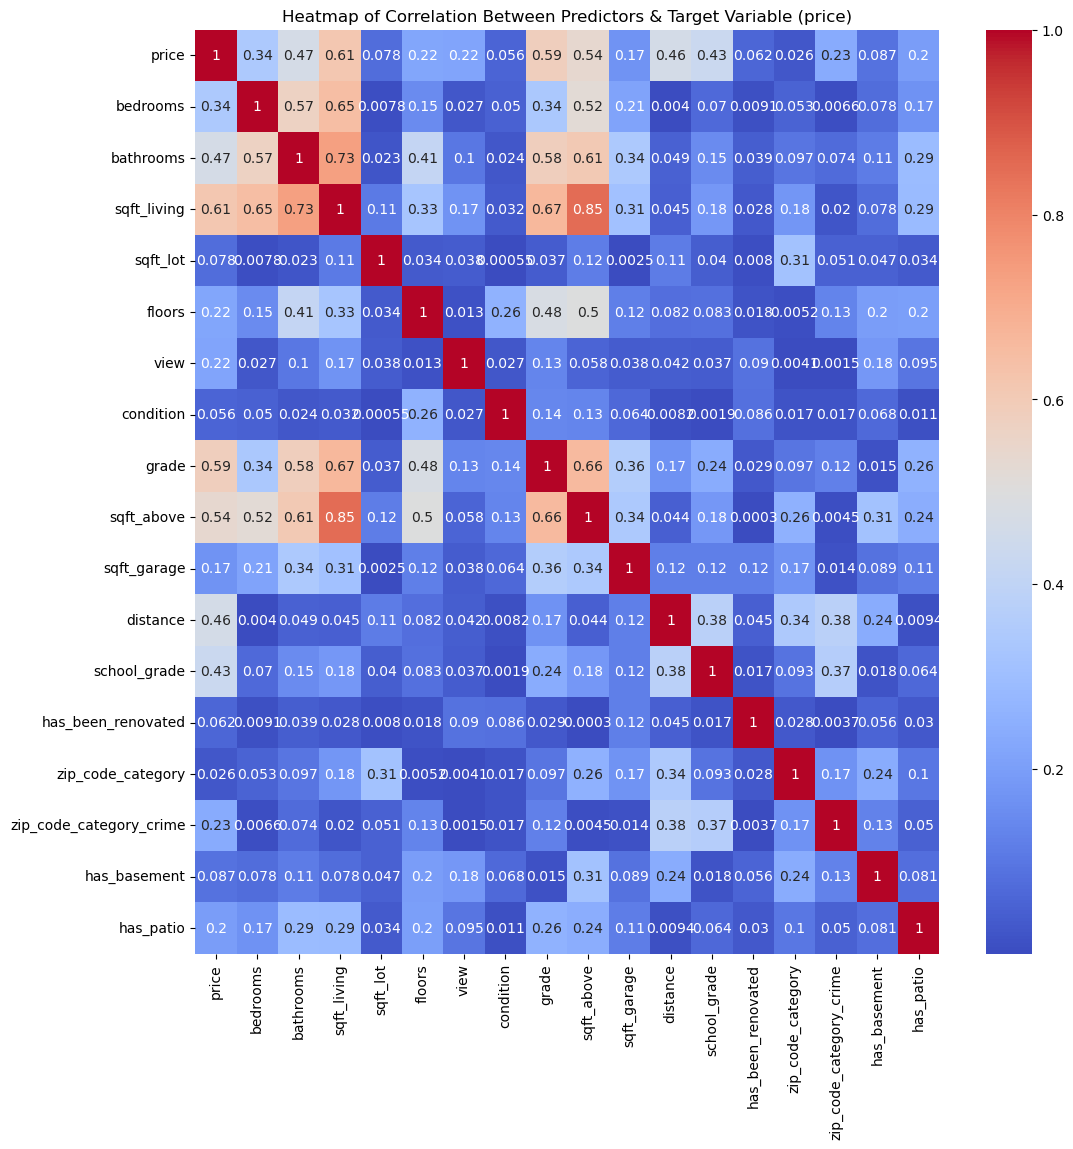

In [4637]:
# set up figure size
fig, ax = plt.subplots(figsize=(12, 12))

# set up correlation matrix
corr = abs(data.drop(['id','sqft_basement','sqft_patio','yr_built','yr_renovated','lat','long'], axis=1).corr())

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Predictors & Target Variable (price)");

plt.show()

# Initial Model
    Before One Hot Incoding Zip Code

In [4638]:
X = data.drop(['price','sewer_system','zip_code','address','date'], axis=1)
y = data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                       float64
id                            int64
bedrooms                      int64
bathrooms                   float64
sqft_living                   int64
sqft_lot                      int64
floors                      float64
waterfront                 category
greenbelt                  category
nuisance                   category
view                          int64
condition                     int64
grade                         int32
sqft_above                    int64
sqft_basement                 int64
sqft_garage                   int32
sqft_patio                    int64
yr_built                      int64
yr_renovated                  int64
lat                         float64
long                        float64
distance                    float64
school_grade                float64
has_been_renovated            int32
zip_code_category             int64
zip_code_category_crime     float64
has_basement                  int32
has_patio                     int32
school_grade_grouped       category
dtype: object. The data was
0         675,000.00
1         920,000.00
2         311,000.00
3         775,000.00
4         592,500.00
            ...     
30150   1,555,000.00
30151   1,313,000.00
30152     800,000.00
30153     775,000.00
30154     500,000.00
Name: price, Length: 24042, dtype: float64
and
        const          id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       1.00  7399300360         4       1.00         1180      7140    1.00   
1       1.00  8910500230         5       2.50         2770      6703    1.00   
2       1.00  1180000275         6       2.00         2880      6156    1.00   
3       1.00  1604601802         3       3.00         2160      1400    2.00   
4       1.00  8562780790         2       2.00         1120       758    2.00   
...      ...         ...       ...        ...          ...       ...     ...   
30150   1.00  7834800180         5       2.00         1910      4000    1.50   
30151   1.00   194000695         3       2.00         2020      5800    2.00   
30152   1.00  7960100080         3       2.00         1620      3600    1.00   
30153   1.00  2781280080         3       2.50         2570      2889    2.00   
30154   1.00  9557800100         3       1.50         1200     11058    1.00   

      waterfront greenbelt nuisance  view  condition  grade  sqft_above  \
0              0         0        0     1          4      7        1180   
1              0         0        1     3          3      7        1570   
2              0         0        0     3          3      7        1580   
3              0         0        0     3          3      9        1090   
4              0         0        1     1          3      7        1120   
...          ...       ...      ...   ...        ...    ...         ...   
30150          0         0        0     1          4      8        1600   
30151          0         0        0     2          3      7        2020   
30152          0         0        1     1          3      7         940   
30153          0         0        0     1          3      8        1830   
30154          0         0        0     1          3      7        1200   

       sqft_basement  sqft_garage  sqft_patio  yr_built  yr_renovated   lat  \
0                  0            0          40      1969             0 47.46   
1               1570            0         240      1950             0 47.71   
2               1580            0           0      1956             0 47.50   
3               1070            1         270      2010             0 47.57   
4                550            1          30      2012             0 47.53   
...              ...          ...         ...       ...           ...   ...   
30150           1130            0         210      1921             0 47.66   
30151              0            0         520      2011             0 47.57   
30152            920            1         110      1995             0 47.61   
30153            740            1         100      2006             0 47.45   
30154              0            1           0      1965             0 47.44   

         long  distance  school_grade  has_been_renovated  zip_code_category  \
0     -122.19      2.49         49.05                   0                  3   
1     -122.36      2.15         70.54                   0                  1   
2     -122.23      2.00         49.05                   0                  2   
3     -122.29      1.85         58.66                   0                  1   
4     -122.07      1.99         72.11                   0                 12   
...       ...       ...           ...                 ...                ...   
30150 -122.33      1.61         58.66                   0                  0   
30151 -122.39      2.36         41.93                   0                  0   
30152 -122.30      1.66         58.66                   0                  0   
30153 -122.19      2.60         49.05                   0                  3   
30154 -122.33      2.83         41.93                   0                  3   

       zip_code_category_crime  has_basement  has_patio school_grade_grouped  
0                         0.17             0          1     (47.066, 51.245]  
1                         6.74             1          1     (67.959, 72.138]  
2                         6.44             1          0     (47.066, 51.245]  
3                         0.16             1          1     (55.423, 59.602]  
4                         1.81             1          1     (67.959, 72.138]  
...                        ...           ...        ...                  ...  
30150                     0.07             1          1     (55.423, 59.602]  
30151                     0.04             0          1     (38.667, 42.888]  
30152                     0.09             1          1     (55.423, 59.602]  
30153                     0.17             1          1     (47.066, 51.245]  
30154                    20.19             0          0     (38.667, 42.888]  

[24042 rows x 29 columns]
before. After,
[675000. 920000. 311000. ... 800000. 775000. 500000.]
[[1.0 7399300360 4 ... 0 1 Interval(47.066, 51.245, closed='right')]
 [1.0 8910500230 5 ... 1 1 Interval(67.959, 72.138, closed='right')]
 [1.0 1180000275 6 ... 1 0 Interval(47.066, 51.245, closed='right')]
 ...
 [1.0 7960100080 3 ... 1 1 Interval(55.423, 59.602, closed='right')]
 [1.0 2781280080 3 ... 1 1 Interval(47.066, 51.245, closed='right')]
 [1.0 9557800100 3 ... 0 0 Interval(38.667, 42.888, closed='right')]].

# One Hot Incoding Zip Codes

In [ ]:
# One hot encode categoricals
zipcode_ohe = pd.get_dummies(data['zip_code'], drop_first=True)
#Concatenate the new dataframe with X_third_train, call new train set with zipcodes X_third_train_zip
data = pd.concat([data, zipcode_ohe], axis=1)

In [ ]:
data.drop(['zip_code'], axis=1, inplace=True)

In [ ]:
X = data.drop(['price','sewer_system','address','date'], axis=1)
y = data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     621.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:08:49   Log-Likelihood:            -3.3339e+05
No. Observations:               24042   AIC:                         6.670e+05
Df Residuals:                   23944   BIC:                         6.678e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

# Checking Skewness and Kurtosis of the Category Columns

In [ ]:
from scipy.stats import skew, kurtosis

# compute skewness and kurtosis of the data
data_skewness = skew(data['zip_code_category'])
data_kurtosis = kurtosis(data['zip_code_category'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 4.066024162093477
Kurtosis: 27.80881907791652


In [ ]:
# compute skewness and kurtosis of the data
data_skewness = skew(data['sqft_living'])
data_kurtosis = kurtosis(data['sqft_living'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.7021730141156806
Kurtosis: 0.2078176507739662


In [ ]:
# compute skewness and kurtosis of the data
data_skewness = skew(data['sqft_lot'])
data_kurtosis = kurtosis(data['sqft_lot'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 28.44037368477573
Kurtosis: 1428.4588235007436


In [ ]:
# compute skewness and kurtosis of the data
data_skewness = skew(data['zip_code_category_crime'])
data_kurtosis = kurtosis(data['zip_code_category_crime'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 2.7997581128538576
Kurtosis: 10.139346042645103


In [ ]:
# compute skewness and kurtosis of the data
data_skewness = skew(data['school_grade'])
data_kurtosis = kurtosis(data['school_grade'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: -0.39995523909306124
Kurtosis: -1.1035221709841339


# Lets fix the columns we found that are skewed by using Log Transforms

In [ ]:
data['zip_code_category_crime'] = np.log(data['zip_code_category_crime']+1)
data['zip_code_category'] = np.log(data['zip_code_category']+1)
data['sqft_living'] = np.log(data['sqft_living'])
data['sqft_lot'] = np.log(data['sqft_lot'])

In [ ]:
# compute skewness and kurtosis of the data
data_skewness = skew(data['zip_code_category_crime'])
data_kurtosis = kurtosis(data['zip_code_category_crime'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.6933194967884816
Kurtosis: -0.5820171042861313


In [ ]:
# compute skewness and kurtosis of the data
data_skewness = skew(data['zip_code_category'])
data_kurtosis = kurtosis(data['zip_code_category'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.33767293447200325
Kurtosis: -0.3885105099607902


In [ ]:
# compute skewness and kurtosis of the data
data_skewness = skew(data['sqft_lot'])
data_kurtosis = kurtosis(data['sqft_lot'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.6462957404974558
Kurtosis: 3.0430030458533626


In [ ]:
# compute skewness and kurtosis of the data
data_skewness = skew(data['sqft_living'])
data_kurtosis = kurtosis(data['sqft_living'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: -0.29933458566351917
Kurtosis: -0.05900091074763392


# Replace Date, Year Build, and Year Renovated
* I added a column called years since build or renovated to replace the columns that woulden't work in a model as they are not really numeric 

In [ ]:
data['yr_renovated'] = np.where(data['yr_renovated'] == 0, data['yr_built'], data['yr_renovated'])
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['years_since_build_or_renov'] = data['year'] - data[['yr_built', 'yr_renovated']].min(axis=1)
data.drop(['date', 'year', 'yr_built', 'yr_renovated'], axis=1, inplace=True)

In [4642]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24042 entries, 0 to 30154
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       24042 non-null  int64         
 1   date                     24042 non-null  datetime64[ns]
 2   price                    24042 non-null  float64       
 3   bedrooms                 24042 non-null  int64         
 4   bathrooms                24042 non-null  float64       
 5   sqft_living              24042 non-null  int64         
 6   sqft_lot                 24042 non-null  int64         
 7   floors                   24042 non-null  float64       
 8   waterfront               24042 non-null  category      
 9   greenbelt                24042 non-null  category      
 10  nuisance                 24042 non-null  category      
 11  view                     24042 non-null  int64         
 12  condition                24042 n

# Train / Test Split

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data.drop(columns=["id", "address", "lat", "long","sewer_system",'sqft_above','sqft_basement','sqft_patio','sqft_garage']), data["price"], test_size=0.33, random_state=42)

In [ ]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     419.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:08:50   Log-Likelihood:            -2.2380e+05
No. Observations:               16108   AIC:                         4.478e+05
Df Residuals:                   16018   BIC:                         4.485e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
#train_data.drop(["has_patio"], axis=1, inplace=True)
#test_data.drop(["has_patio"], axis=1, inplace=True)

#train_data.drop(["floors"], axis=1, inplace=True)
#test_data.drop(["floors"], axis=1, inplace=True)

#train_data.drop(["nuisance"], axis=1, inplace=True)
#test_data.drop(["nuisance"], axis=1, inplace=True)

train_data.drop(['bathrooms'], axis=1, inplace=True)
test_data.drop(['bathrooms'], axis=1, inplace=True)

train_data.drop(["greenbelt"], axis=1, inplace=True)
test_data.drop(["greenbelt"], axis=1, inplace=True)

train_data.drop(["bedrooms"], axis=1, inplace=True)
test_data.drop(["bedrooms"], axis=1, inplace=True)

#train_data.drop(["condition"], axis=1, inplace=True)
#test_data.drop(["condition"], axis=1, inplace=True)

#train_data.drop(["sqft_living"], axis=1, inplace=True)
#test_data.drop(["sqft_living"], axis=1, inplace=True)

                   

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(train_data[['years_since_build_or_renov']])

# Transform the 'years_since_build_or_renov' column
train_data['years_since_build_or_renov'] = scaler.transform(train_data[['years_since_build_or_renov']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(test_data[['years_since_build_or_renov']])

# Transform the 'years_since_build_or_renov' column
test_data['years_since_build_or_renov'] = scaler.transform(test_data[['years_since_build_or_renov']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(train_data[['school_grade']])

# Transform the 'years_since_build_or_renov' column
train_data['school_grade'] = scaler.transform(train_data[['school_grade']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(test_data[['school_grade']])

# Transform the 'years_since_build_or_renov' column
test_data['school_grade'] = scaler.transform(test_data[['school_grade']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(train_data[['distance']])

# Transform the 'years_since_build_or_renov' column
train_data['distance'] = scaler.transform(train_data[['distance']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(test_data[['distance']])

# Transform the 'years_since_build_or_renov' column
test_data['distance'] = scaler.transform(test_data[['distance']])

In [ ]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     428.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:08:51   Log-Likelihood:            -2.2387e+05
No. Observations:               16108   AIC:                         4.479e+05
Df Residuals:                   16021   BIC:                         4.486e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

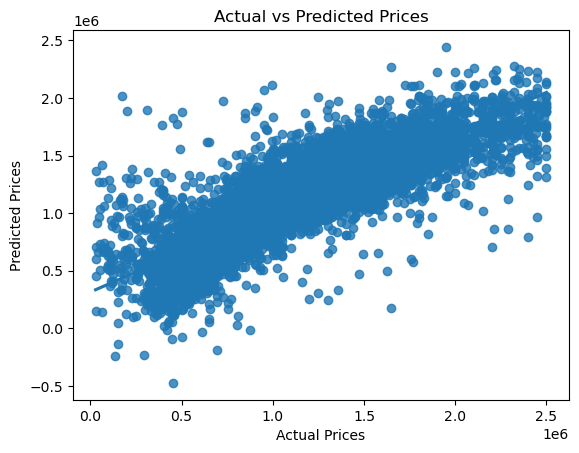

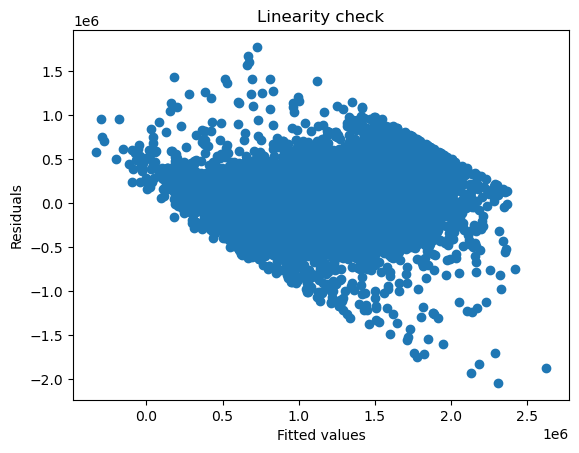

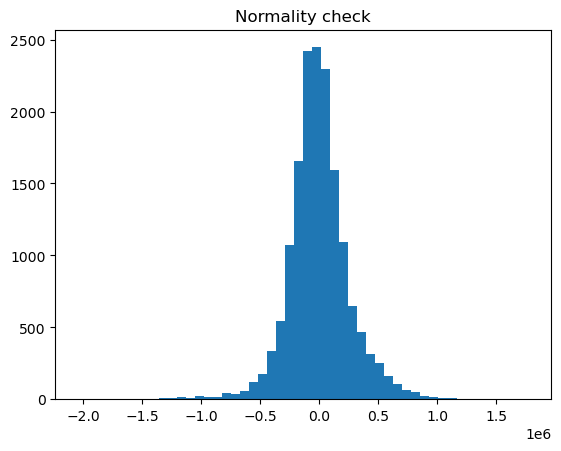

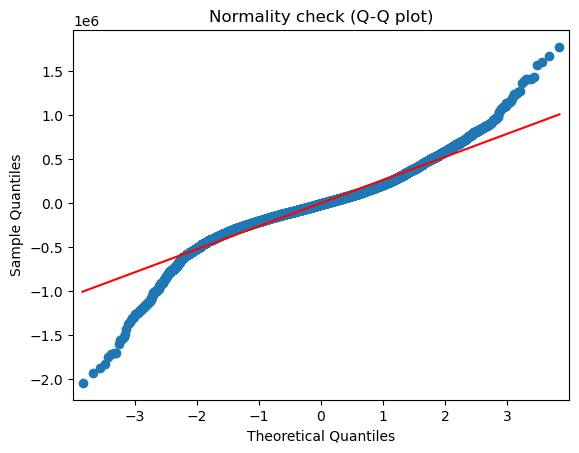

In [ ]:
# Fit the model to the training data
#model = sm.OLS(train_data['price'], train_data.drop(['price'], axis=1))
#results = model.fit()

# Use the fitted model to make predictions on the test data
X_test = sm.add_constant(test_data.drop(['price'], axis=1))
predictions = model.predict(X_test)


# Compare the predicted values with the actual prices in the test data
sns.regplot(x=test_data['price'], y=predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# calculate the residuals
#residuals = model2.resid_response

residuals = model.resid

# Plot the residuals against the fitted values to check for linearity
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity check")
plt.show()

# Plot a histogram of the residuals to check for normality
plt.hist(residuals, bins=50)
plt.title("Normality check")
plt.show()

# Plot a Q-Q plot of the residuals to check for normality

sm.qqplot(residuals, line='s')
plt.title("Normality check (Q-Q plot)")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test_data['price'], predictions))

# Calculate the MAE
mae = mean_absolute_error(test_data['price'], predictions)

r2 = r2_score(test_data['price'], predictions)


print("RMSE:", rmse)
print("MAE:", mae)
print('R-squared score:', r2*100)

RMSE: 262207.5439116538
MAE: 186455.57501162603
R-squared score: 69.87221511874762
